In [39]:
import sys
sys.path.append("..")

In [40]:
import Graph
import MNIST
from importlib import reload
from scipy.sparse import csr_matrix
import numpy as np

In [41]:
size = 1000

In [42]:
# reload(Graph)
# train_x, train_Y = MNIST.load_pymde_mnist(size)
# embedding = Graph.construct_embedding(train_x)
# Graph.save_embedding(train_x, train_Y, embedding)

In [43]:
reload(Graph)
train_x, train_Y, embedding = Graph.load_embedding(size)

In [44]:
g = Graph.construct_knn_graph_3(embedding)

Constructing knn graph


100%|██████████| 1000/1000 [00:00<00:00, 37040.38it/s]

Converting to csr


In [45]:
import Visualization

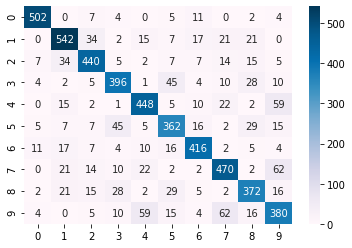

In [46]:
reload(Visualization)
heat = Visualization.g_neighbormap(g, train_Y)

In [47]:
oht = Graph.one_hot_encode_labels(train_Y)
oht, forg_indices = Graph.forget_oht_labels(oht, forget_percentage=.99)

forg_labels = np.copy(train_Y)
forg_labels[forg_indices] = -1

true_indices = np.ones(size, bool)
true_indices[forg_indices] = 0

In [48]:
sparse_oht = csr_matrix(oht)

In [49]:
new_lbls = Graph.propagate_labels(g, sparse_oht, max_itter=20)

100%|██████████| 20/20 [00:00<00:00, 869.56it/s]


In [50]:
true_lbls = train_Y[forg_indices]
pred_lbls = new_lbls[forg_indices]

In [51]:
print(Graph.test_accuracy(true_lbls=true_lbls, pred_labels=pred_lbls))

49.09090909090909


In [52]:
import Skeletonize

In [53]:
reload(Skeletonize)
pg = Skeletonize.from_matrix_embedding_to_pygel(g, embedding)

Converting matrix to pygel using precomputed embedding
Creating nodes


1000it [00:00, 222167.70it/s]


Connecting Nodes


100%|██████████| 5436/5436 [00:00<00:00, 988692.45it/s]


In [54]:
from pygel3d import jupyter_display as jd

In [55]:
jd.display(pg)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(0,0,0)', 'width': 1},
 …

In [56]:
reload(Skeletonize)
spg, smap = Skeletonize.local_skeletonize_pg(pg)

Skeletonization has yielded 1000 -> 407 nodes


In [57]:
jd.display(spg)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(0,0,0)', 'width': 1},
 …

In [58]:
a = np.array(smap)
print(len(spg.nodes()))

407


In [59]:
reload(Skeletonize)
smg, slbls = Skeletonize.from_pygel_to_matrix(spg, forg_labels, smap)

Creating matrix graph


100%|██████████| 407/407 [00:00<00:00, 73989.33it/s]


Creating oht label graph


100%|██████████| 1000/1000 [00:00<00:00, 1998239.16it/s]

Choosing the most present label


In [60]:
prop_labels = Graph.propagate_labels(smg, slbls)

100%|██████████| 20/20 [00:00<00:00, 178.58it/s]


In [61]:
reload(Skeletonize)
relbls = Skeletonize.remap_labels(prop_labels, smap)

Remaping labels


100%|██████████| 1000/1000 [00:00<00:00, 2002054.42it/s]


In [62]:
print(Graph.test_accuracy(train_Y, relbls))

49.1


In [63]:

reload(MNIST)

<module 'MNIST' from '..\\MNIST.py'>

In [112]:
reload(Graph)
test_x, test_Y = MNIST.load_pymde_testset()
Graph.test_nums_accuracy(train_x, test_x, relbls, test_Y, k=4)

Aug 13 04:19:39 PM: Loading cached dataset.


38.37

In [ ]:
reload(Graph)
test_x, test_Y = MNIST.load_pymde_testset()
Graph.test_embedded_accuracy(embedding, )